In [ ]:
!pip install cartopy   ###先安装包--获取世界地图

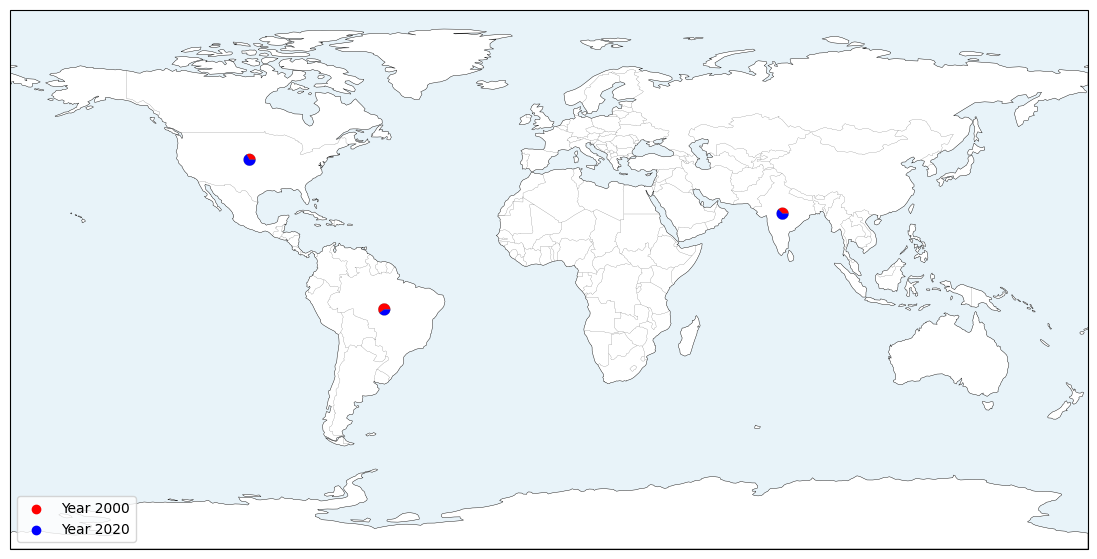

In [6]:
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from matplotlib.transforms import Affine2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# 示例数据框，包含多个时间点
data = {
    "country": ["USA", "USA", "India", "India", "Brazil", "Brazil"],
    "longitude": [-100, -100, 78, 78, -55, -55],
    "latitude": [40, 40, 22, 22, -10, -10],
    "year": [2000, 2020, 2000, 2020, 2000, 2020],
    "value": [100, 200, 150, 250, 120, 80],
}

df = pd.DataFrame(data)

# 聚合数据：按国家分组，计算每个时间点的比例
grouped = df.groupby("country")

# 开始绘图
fig = plt.figure(figsize=(14, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# 设置全局显示范围
ax.set_global()

# 添加海洋和陆地填充颜色
# 设置全局显示范围
ax.set_global()

# 添加海洋和陆地填充颜色
ax.add_feature(cfeature.OCEAN, facecolor="#e8f3f9")  # 海洋为淡蓝色
ax.add_feature(cfeature.LAND, facecolor="white", edgecolor="black",linewidth=0.3)  # 陆地为灰白色
ax.add_feature(cfeature.BORDERS, linestyle="-", linewidth=0.1)

# 饼图绘制函数
def plot_pie(ax, center, sizes, total_value, colors, transform, scale=0.1):
    start_angle = 0
#     radius = scale * total_value*1 # 饼图大小与总数据量成正比
    radius =2
    for size, color in zip(sizes, colors):
        angle = 360 * size
        wedge = Wedge(center, radius, start_angle, start_angle + angle, facecolor=color, edgecolor="black", lw=0.1)
        ax.add_patch(wedge)
        start_angle += angle

# 颜色映射不同时间点
time_colors = {2000: "red", 2020: "blue"}

# 遍历每个国家，绘制饼图
for country, group in grouped:
    total_value = group["value"].sum()
    sizes = group["value"] / total_value
    colors = [time_colors[year] for year in group["year"]]
    center = (group["longitude"].iloc[0], group["latitude"].iloc[0])
    plot_pie(ax, center, sizes, total_value, colors, transform=ccrs.PlateCarree())

# 添加图例
for year, color in time_colors.items():
    ax.scatter([], [], color=color, label=f"Year {year}")
plt.legend(loc="lower left")

# 设置标题
# ax.set_title("Lake Water Storage Trend (Pie Chart Representation)")
# plt.savefig("world_map_Time_distribution.png",bbox_inches = 'tight',dpi=800)
plt.show()
